In [ ]:
# data.zip 파일 업로드

In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

In [2]:
# 1. Custom data set 만들기 (참고 https://saneblog.tistory.com/9)
# 1-1. wav 파일을 spectrogram image로 만들어 저장
# 1-2. train set 과 test set을 분류
# 1-3. Labeling

In [3]:
# zip file(.wav files) 압축 해제
import zipfile

fantasy_zip = zipfile.ZipFile('/content/data.zip')
fantasy_zip.extractall('/content/')
 
fantasy_zip.close()

In [4]:
# spectrograms 변환 함수 만들기
# 참고: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
# spectrograms 는 2차원의 numpy array로 저장된다. 축 하나는 frequency, 다른 축 하나는 time이다.
# sr = sampling rate(Hz) : 1초에 얼마만큼의 sample을 sampling 할지
# frame = short audio clip (<=> spectrogram column) : 
#         긴 wav파일을 frame을 나눠서 분석하고 다룰 때 필요한 작은 단위
# n_fft = samples per frame : 한 프레임 안에 있는 샘플 수
# hop_length = #samples between frames : 프레임을 이동시킬 때 몇개의 샘플 수 기준으로 옮겨갈지
# default setting
#   sr: 22050
#   n_fft: 2048
#   hop_length: 512 (대부분 n_fft의 1/4 사이즈로 이동)
# librosa 에서 stft는 간단하게 계산된다
def make_iamge(SOURCE, TARGET):

    #%matplotlib inline

    #audio_path = 'C:/workspace/sogang04/tensorflow/midterm/drum_wavset/acoustic/acoust_SD/RealDrum01_00#SD#train.wav'
    file = SOURCE
    y, sr = librosa.load(file)
    # y: np.ndarray; audio time series;
    # sr: number; sampling rate of y ; 샘플링 주파수; 초)당 샘플링 횟수; Hz; default sr=22050

    # print(type(y), type(sr))
    # print(y.shape, sr)
    print(TARGET)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    librosa.display.specshow(S_dB, sr=sr)
    plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)    

In [5]:
# wav파일별로 Spectrogram 변환 실행위한 경로 변수 설정
in_path = '/content/data/in/'
out_path = '/content/data/out/'
label_path = ['a_h','a_k','a_s','e_h','e_k','e_s']
len(label_path)

6

In [6]:
# 폴더삭제
import shutil
shutil.rmtree(r'/content/data/out')

In [7]:
# # 폴더생성
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
outfolder = '/content/data/out'
createFolder(outfolder)
for i in label_path:
  createFolder(outfolder+'/'+i)

In [8]:
# wav파일별로 Spectrogram 변환 실행
for i in label_path:
        # print(wav_home_path+i)
        file_list = os.listdir(in_path+i)
        #print(len(file_list))
        #print(file_list)
        for j in file_list:
            SOURCE = in_path+i+"/"+j
            TARGET = out_path+i+"/"+j[:-3]+"jpg"
            #TARGET = "C:/data/out/"+j[:-3]+"jpg"
            #print(SOURCE)
            #print(TARGET)
            # ----------------------------------------
            # 아랫줄 make_iamge() 실행하면 이미지 생성 됨
            make_iamge(SOURCE, TARGET)
            # ----------------------------------------

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# 이미지 로드 및 전처리
# 참고: https://www.tensorflow.org/tutorials/load_data/images?hl=ko
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [11]:
print(tf.__version__)

2.6.0


In [12]:
# 데이터세트 형식으로 만들기
import pathlib

data_dir = pathlib.Path('/content/data/out')
print(type(data_dir))
print(data_dir)

<class 'pathlib.PosixPath'>
/content/data/out


In [13]:
# image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

687


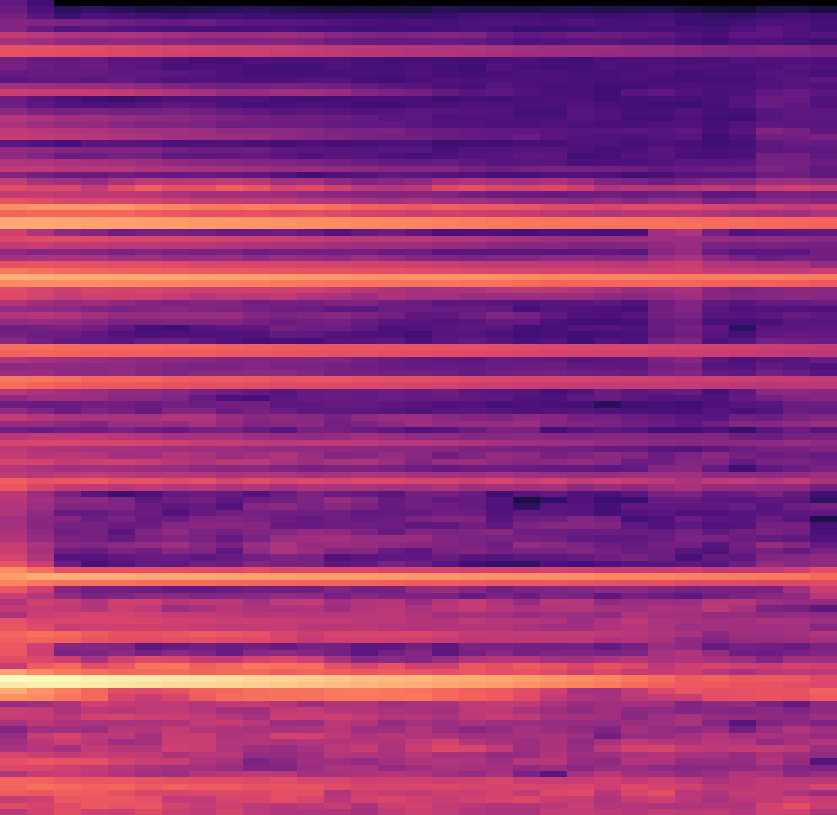

In [14]:
# image 1개 보기
a_h = list(data_dir.glob('a_h/*'))
PIL.Image.open(str(a_h[0]))

In [15]:
# 데이터세트 만들기
batch_size = 32
img_height = 180
img_width = 180

In [16]:
# Training set 80%
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    # color_mode='grayscale', #Default: "rgb"
    batch_size=batch_size,
)

Found 687 files belonging to 6 classes.
Using 550 files for training.


In [17]:
# Validation set 20%
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    # color_mode='grayscale', #Default: "rgb"
    batch_size=batch_size,
)

Found 687 files belonging to 6 classes.
Using 137 files for validation.


In [18]:
# class_names 속성에서 클래스 이름을 찾기
class_names = train_ds.class_names
print(class_names)

['a_h', 'a_k', 'a_s', 'e_h', 'e_k', 'e_s']


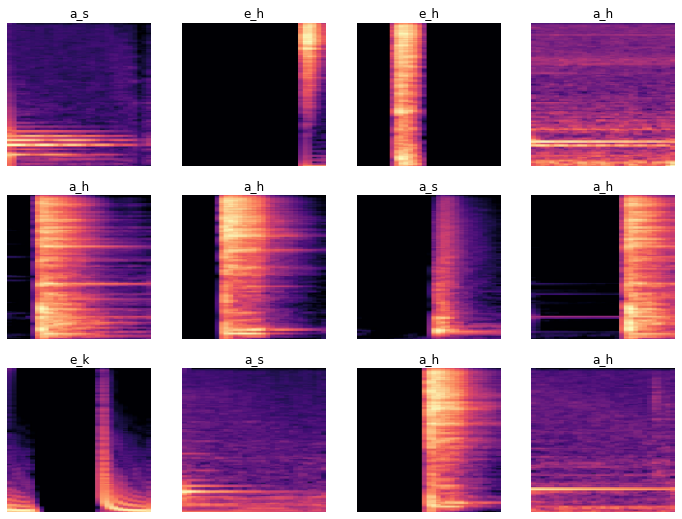

In [19]:
# 데이터 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
# 데이터세트를 수동으로 반복하고 이미지 배치를 검색
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [21]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 180, 180, 3)
Label:  [1 2 0 1 3 2 5 0 3 0 0 1 0 2 0 1 1 0 2 5 3 4 2 1 1 4 2 0 0 1 0 1]


In [22]:
# 데이터 표준화하기
# [0, 1] 범위에 있도록 값을 표준화
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [23]:
# 표준화
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [24]:
# 성능을 위한 데이터세트 구성하기
# AUTOTUNE = tf.data.AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
# train_ds의 첫번째 항목 확인
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 180, 180, 3)
Label:  [5 0 0 5 0 5 1 4 1 3 2 0 0 3 0 0 0 0 3 2 4 4 4 0 1 0 0 0 0 4 0 0]


In [ ]:
# 모델 훈련하기
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [34]:
# 모델 훈련하기
num_classes = 6
# tf.keras.layers.Conv2D(
#     filters, kernel_size, strides=(1, 1), padding='valid',
#     data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
#     use_bias=True, kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#     bias_constraint=None, **kwargs
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same", strides=1),#,input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding="same", strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding="same", strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [35]:
#model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [36]:
# 20번 epoch 훈련
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
18/18 [==============================] - 46s 569ms/step - loss: 2.3463 - accuracy: 0.3800 - val_loss: 1.2196 - val_accuracy: 0.4380
Epoch 2/20
18/18 [==============================] - 7s 379ms/step - loss: 0.9280 - accuracy: 0.6436 - val_loss: 0.8909 - val_accuracy: 0.7080
Epoch 3/20
18/18 [==============================] - 7s 378ms/step - loss: 0.6242 - accuracy: 0.7727 - val_loss: 0.5860 - val_accuracy: 0.7956
Epoch 4/20
18/18 [==============================] - 7s 377ms/step - loss: 0.4755 - accuracy: 0.8218 - val_loss: 0.3445 - val_accuracy: 0.9124
Epoch 5/20
18/18 [==============================] - 7s 377ms/step - loss: 0.3267 - accuracy: 0.8636 - val_loss: 0.3276 - val_accuracy: 0.8467
Epoch 6/20
18/18 [==============================] - 7s 380ms/step - loss: 0.2553 - accuracy: 0.9200 - val_loss: 0.2052 - val_accuracy: 0.9343
Epoch 7/20
18/18 [==============================] - 7s 378ms/step - loss: 0.1443 - accuracy: 0.9545 - val_loss: 0.2493 - val_accuracy: 0.9124
Epoch

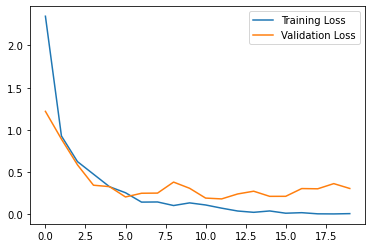

In [38]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [53]:
# my_model 폴더삭제
import shutil
shutil.rmtree(r'/content/my_model')

In [2]:
# 모델 저장
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 참고: https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko
model.save("/content/my_model.h5")

In [6]:
# 모델 불러오기
model = keras.models.load_model("/content/my_model.h5")

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 256)       0

In [ ]:
# 모델 아키텍처 보기
# 참고: https://tykimos.github.io/2017/06/10/Model_Save_Load/

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [28]:
# val_ds의 첫번째 항목 확인
for image, label in val_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 180, 180, 3)
Label:  [4 2 2 0 1 3 3 1 2 0 2 3 2 2 0 3 0 1 0 4 4 2 2 2 2 0 3 5 0 1 4 0]


In [60]:
# 참고: https://www.tensorflow.org/guide/saved_model?hl=ko
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

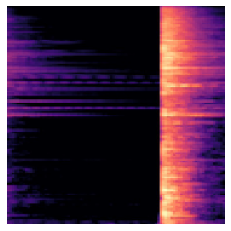

In [192]:
# file = tf.keras.utils.get_file(
#     "grace_hopper.jpg",
#     "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
# img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
img = tf.keras.preprocessing.image.load_img('/content/a_h_039.jpg', target_size=[180, 180])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])

In [202]:
#tf.keras.applications.vgg19.decode_predictions
# labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels = np.array(open('/content/label.txt').read().splitlines())
imagenet_labels

array(['e_s', 'e_k', 'e_h', 'a_s', 'a_k', 'a_h'], dtype='<U3')

In [203]:
def run_predict(file):
  img = tf.keras.preprocessing.image.load_img(file, target_size=[180, 180])
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis
  predictions = model.predict(img_array)

  print("Acoustic Hihat:",round(predictions[0,0]*100,2),"%")
  print("Acoustic Kick:",round(predictions[0,1]*100,2),"%")
  print("Acoustic Snare:",round(predictions[0,2]*100,2),"%")
  print("Electronic  Hihat:",round(predictions[0,3]*100,2),"%")
  print("Electronic  Kick:",round(predictions[0,4]*100,2),"%")
  print("Electronic  Snare:",round(predictions[0,5]*100,2),"%")

In [204]:
run_predict('/content/a_h_039.jpg')

Acoustic Hihat: 99.99 %
Acoustic Kick: 0.0 %
Acoustic Snare: 0.0 %
Electronic  Hihat: 0.0 %
Electronic  Kick: 0.0 %
Electronic  Snare: 0.01 %


In [205]:
run_predict('/content/a_k_015.jpg')

Acoustic Hihat: 0.0 %
Acoustic Kick: 99.98 %
Acoustic Snare: 0.0 %
Electronic  Hihat: 0.0 %
Electronic  Kick: 0.01 %
Electronic  Snare: 0.0 %


In [206]:
run_predict('/content/e_h_020.jpg')

Acoustic Hihat: 0.0 %
Acoustic Kick: 0.0 %
Acoustic Snare: 0.0 %
Electronic  Hihat: 100.0 %
Electronic  Kick: 0.0 %
Electronic  Snare: 0.0 %
